# Overview

This is a class for engineers who want to apply machine learning/deep learning to real world problems.  

The material assumes no prior experience with machine learning or deep learning and tries to have as little of a math prerequisite as possible.  Unlike other introductory courses, it covers the real-world pitfalls like messy data preparation, comparing models to baselines and deploying models.  All of the material uses real-world data sets and real wolrd applications and best-in-class libraries.  I'm passionate about teaching this material becuase I think machine learning is incredibly powerful and it still isn't used as much as it could be - and I believe the limiting factor is a lack of people who know how to really make it work.

Personally, I love machine learning theory as well, but this course covers much more practice than theory because there are many excellent resources online to learn the theory.  

I strongly believe in learning by doing and learning by experimentation and I hope putting this course in a Jupyter notebook encourages students to explore the material and ask questions.  It should be possible to work through each notebook in under 30 minutes and if you get through all the notebooks you will learn a lot.  

## Language

I cover everything in python because python is by far the most popular language for deep learning.  If you haven't done any python but have done a lot of programming, you shouldn't find python too hard to pick up.  If you haven't done any programming before, I might recommend checking out Learn Python the Hard Way (https://learnpythonthehardway.org/) or many of the online courses, or if you feel ambitious, you can try to just jump right in.

## Libraries

1. **scikit-learn** for non-deep learning because it is the most versatile machine learning library, good for beginners and experts. 
2. **keras** and **tensorflow** for deep learning because they are standard and popular, easy to use and easy to deploy.
3. **numpy** and **pandas** for the math and data exploration because they are so standard and useful.

## Overview of Supervised Machine Learning/Deep Learning

If you want to jump right in and skip this section - go for it!  It might make more sense once you have finished the courses.

### Supervised Machine Learning

Most of the real world applications of Machine Learning are instances of *supervised machine learning*.  In supervised machine learning you take *training data* which includes inputs and outputs and you build a model that predicts outputs from new inputs.

You have probably done a linear regression in your life.  We don't always think of that as machine learning but it's definitely a simple type of machine learning.

Let's do a simple example where we do a regression to predict regional house prices based on the size of houses.

* input: avg house size
* oputput: avg house price 

/Users/l2k/.pyenv/versions/3.6.1/envs/wandb-3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


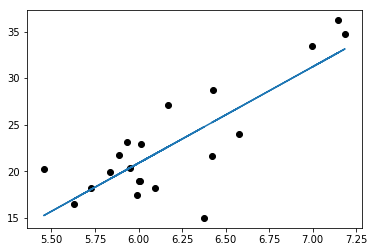

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn import datasets
import matplotlib.pyplot as plt  # matplotlib is a graphing library
%matplotlib inline

# Load the boston housing price dataset
# Dataset of house prices by area
boston_houses = datasets.load_boston()

# load the average number of rooms for the first 20 records
avg_rooms = boston_houses.data[:20, np.newaxis, 5]

# load the price for the first 20 records
price = boston_houses.target[:20]

# build a linear regression model
model = LinearRegression()
model.fit(avg_rooms, price)

# predict the best fit line
preds = model.predict(avg_rooms)

# graph the data
plt.scatter(avg_rooms, price,  color='black')
plt.plot(avg_rooms, preds)

Here the black dots are data points and the blue line is our model.  If we feed 6.25 into our model, it will output 24.  If we feed 7 into our model it will output around 30. 

### More Complicated Regression

We can build a more complicated model on just these data points in a lot of different ways.

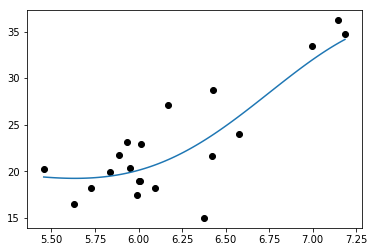

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C,  WhiteKernel

# initializa a model
model = GaussianProcessRegressor(
    kernel=C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1)) + WhiteKernel(1.0),
    normalize_y=True)

# fit the model
model.fit(avg_rooms, price)

# pick points to sample
num_samples = 100
X = np.linspace(min(avg_rooms), max(avg_rooms), num_samples).reshape(num_samples,1)

preds = model.predict(X)
plt.scatter(avg_rooms, price,  color='black')
plt.plot(X, preds)

Here we used a modeling tool called a Gaussian Process to draw a line through the points.  It's no longer linear and it might fit our data better.

### Too-Complicated Regression

We can draw an infinite number of lines through our data.  Here's another example:

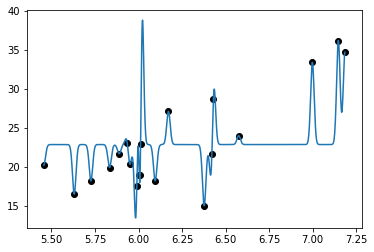

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# initialize a model
model = GaussianProcessRegressor(
    kernel=C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
    normalize_y=True)

# fit the model
model.fit(avg_rooms, price)
X = np.linspace(min(avg_rooms), max(avg_rooms), 1000).reshape(1000,1)
preds = model.predict(X)

plt.scatter(avg_rooms, price,  color='black')
plt.plot(X, preds)

This line doesn't seem as good, but it does pass through all the points.  We would call this model "overfitting".

This data has only one number as input, typically we might have thousands or millions of inputs.  This data also has a number as an output.  When we output a number we call the modeling problem a regression.  When we output a category, we call the modeling problem classification.  Classification and regression might seem like different problems but they are very similar.

## Machine Learning Algorithms

One of the most popular machine learning websites, Kaggle, did a [survey](https://www.kaggle.com/surveys/2017) in 2017 asking data scients which alogrithms they used.  Logistic Regression, a slight variant on the linear regression above was actually the most frequently used machine learning technique.
![](images/kaggle-algorithms.png)

### Deep Learning
Deep Learning is the most exciting type of Machine Learning right now.  It tends to be useful when you have really large data sets and you're willing to trade compute complexity for accuracy.  As computers get faster and data sets get larger, deep learning becomes more and more important.

Deep Learning typically involves using neural networks which is a class of models.  The models tend to take a longer time to train and are trickier to deploy but fundamentally deep learning is not very different from machine learning.  It tends to be especially useful in vision and speech, although these days people have found ways to apply it to nearly every problem.

I typically start teaching the fundamentals of machine learning without deep learning because the models are a little faster to run and there is a lot of overlap.  But I try to get to deep learning quickly because I know that's what students are excited about and that's where most of the best models are these days.

Francois Chollet, the author of the Keras deep learning library put it well:
> The ML research community has long been driven by the need to publish, which results in a stark, sometimes ridiculous bias towards complexity. Remember to ask: "can we do this with k-means and logistic regression?"

## Key Takeaways

1. Supervised machine learning/deep learning means you build a model from training data.
2. Deep learning is a type of machine learning

## Questions

1. Why isn't deep learning/neural networks the most commonly used class of algorithms?
2. Why isn't a more complicated model always better?